# Lack of Robustness of the Markowitz Procedure, and GMV

In [79]:
import pandas as pd
import numpy as np
import risk_kit as rk
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
ind= rk.get_ind_returns()
er= rk.annualized_rets(ind['1996':'2000'], 12)
cov= ind['1996':'2000'].cov()

In [81]:
l= ['Food', 'Steel']
rk.msr(0.1, er[l], cov.loc[l,l])

array([0.75040362, 0.24959638])

Our optimizer says that hey you should allocate 75% in Food and 25% in Steel.
Let's see the expected return of each.

In [82]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [83]:
#We try again using returns that slightly different.
rk.msr(0.1, np.array([0.11, 0.12]), cov.loc[l,l])

array([0.57930354, 0.42069646])

In [84]:
rk.msr(0.1, np.array([0.10, 0.13]), cov.loc[l,l])

array([0., 1.])

In [85]:
rk.msr(0.1, np.array([0.13, 0.10]), cov.loc[l,l])

array([1., 0.])

Even a small change in the expected returns ends up a dramatic change in weights.  
That means even our estimation error is fairly minor, it'll lead to massive shift in the result.

<AxesSubplot:xlabel='Volatility'>

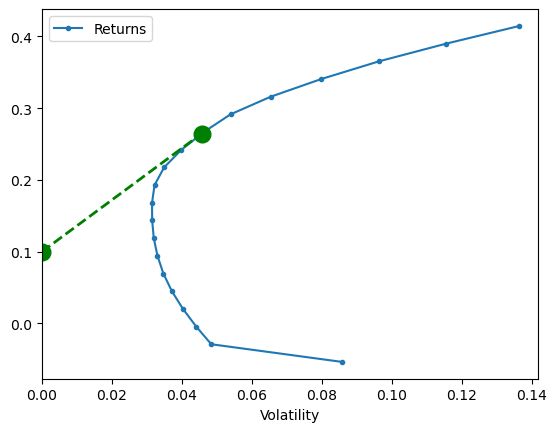

In [86]:
rk.plot_ef(20, er, cov, show_cml=True, riskfree_rate= 0.1)

The MSR portfolio, which is the green dot above, is really hard to get to because we need a excellent estimate of expected returns.  
But there's a porfolio where we don't need expected returns to get to, it is the portfolio that has the lowest volatility.  
That point is on the leftmost of the curve and called GMV, Global Minimum Volatility.  

<AxesSubplot:xlabel='Volatility'>

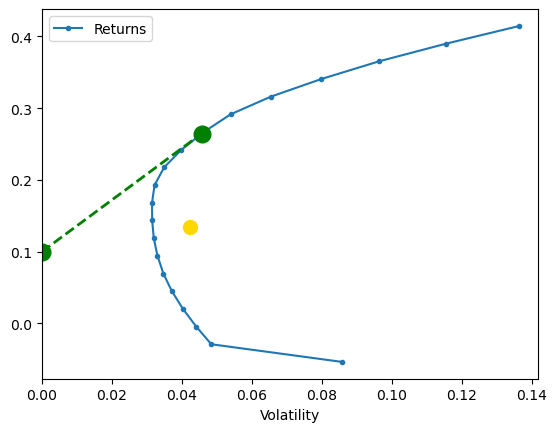

In [87]:
#Let's see where is the equally weighted portfolio
rk.plot_ef(20, er, cov, show_cml=True, riskfree_rate= 0.1, show_ew= True)

<AxesSubplot:xlabel='Volatility'>

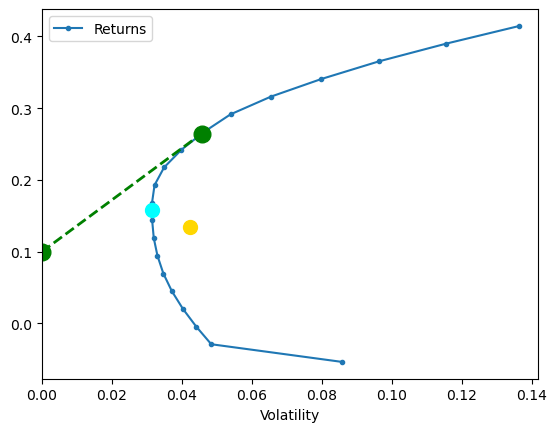

In [88]:
#Let's see where is the GMV
rk.plot_ef(20, er, cov, show_cml=True, riskfree_rate= 0.1, show_ew= True, show_gmv= True)

That is to say:   
To compute the GMV portfolio(The Cyan point above) does not depends on any estimate of expected returns.

To recap:
- The Green dot on the efficient frontier: Here is where we would good to be, but it's hard to get unless we got good estimation of expected returns.   
- The Gold dot inside the curve: The location of equally weighted portfolio.(Expected returns is not required)
- The Cyan dot on th curve but not on the efficient frontier: The Global Minimum Volatility portfolio, (Expected returns is not required) this is a more reasonable target to go after than the green dot. 